# 분류 성능 평가

분류 문제는 회귀 분석과 달리 모수에 대한 t-검정, 신뢰 구간(confidence interval) 추정 등이 쉽지 않기 때문에 이를 보완하기 위해 다양한 성능 평가 기준이 필요하다.

## Scikit-Learn 에서 지원하는 분류 성능 평가 명령

* `sklearn.metrics` 서브 패키지
 * `confusion_matrix()`
 * `classfication_report()`
 * `accuracy_score(y_true, y_pred)`
 * `precision_score(y_true, y_pred)`
 * `recall_score(y_true, y_pred)`
 * `fbeta_score(y_true, y_pred, beta)`
 * `f1_score(y_true, y_pred)`


## 분류 결과표 Confusion Matrix

분류 결과표는 타겟의 원래 클래스와 모형이 예측한 클래스가 일치하는지는 갯수로 센 결과이다.

원래 클래스는 행(row)으로 예측한 클래스는 열(column)로 나타낸다.
original = 실제 집값 데이터



| | 예측 클래스 0 | 예측 클래스 1 | 예측 클래스 2 | 
|-|-|-|-|
| 원 클래스 0 | <small>원 클래스가 0, 예측 클래스가 0인 표본의 수</small> | <small>원 클래스가 0, 예측 클래스가 1인 표본의 수</small> | <small>원 클래스가 0, 예측 클래스가 2인 표본의 수</small> |
| 원 클래스 1 | <small>원 클래스가 1, 예측 클래스가 0인 표본의 수</small> | <small>원 클래스가 1, 예측 클래스가 1인 표본의 수</small> | <small>원 클래스가 1, 예측 클래스가 2인 표본의 수</small> |
| 원 클래스 2 | <small>원 클래스가 2, 예측 클래스가 0인 표본의 수</small> | <small>원 클래스가 2, 예측 클래스가 1인 표본의 수</small> | <small>원 클래스가 2, 예측 클래스가 2인 표본의 수</small> |


In [1]:
from sklearn.metrics import confusion_matrix

In [2]:
y_true = [2, 0, 2, 2, 0, 1] ## 실제 집값들
y_pred = [0, 0, 2, 2, 0, 2] ## 예측 집값들 ## 결국 맞는것은 6개중에 4개가 맞음
confusion_matrix(y_true, y_pred) ## 가로축: 예측결과, 세로축: 실제값 데이터들, diagnal 이 맞는 답

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]])

In [3]:
y_true = ["cat", "ant", "cat", "cat", "ant", "bird"]
y_pred = ["ant", "ant", "cat", "cat", "ant", "cat"]
confusion_matrix(y_true, y_pred, labels=["ant", "bird", "cat"])
# 알파벳순으로 가로축 ant,bird,cat 예측클래스 /세로축 original ant,bird,cat 클래스

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]])

## 이진 분류 결과표 Binary Confusion Matrix

클래스가 0과 1 두 종류 밖에 없는 경우에는 일반적으로 클래스 이름을 "Positive"와 "Negative"로 표시한다. 

또, 분류 모형의 예측 결과가 맞은 경우, 즉 Positive를 Positive라고 예측하거나 Negative를 Negative라고 예측한 경우에는 "True"라고 하고 예측 결과가 틀린 경우, 즉 Positive를 Negative라고 예측하거나 Negative를 Positive라고 예측한 경우에는 "False"라고 한다.

이 경우의 이진 분류 결과의 명칭과 결과표는 다음과 같다.

실제 집값과 예측집값이 같은 경우는 diagnal True라고 되어있는 것임

| | Positive라고 예측  | Negative라고 예측 | 
|-|-|-|
| 실제 Positive | True Positive   |  False Negative |             
| 실제 Negative | False Positive  |  True Negative  |   

### FDS(Fraud Detection System)의 예

FDS(Fraud Detection System)는 금융 거래, 회계 장부 등에서 잘못된 거래, 사기 거래를 찾아내는 시스템을 말한다. FDS의 예측 결과가 Positive 이면  사기 거래라고 예측한 것이고 Negative 이면 정상 거래라고 예측한 것이다. 이 결과가 사실과 일치하는지 틀리는지에 따라 다음과 같이 말한다. 요새는 도난된 신용카드, 온라인뱅킹을 다른사람이 사용하는경우에 사용함, FDS 성능기준은 알아서 판단해야함 

* True Positive: 사기를 사기라고 정확하게 예측
* True Negative: 정상을 정상이라고 정확하게 예측
* False Positive: 정상을 사기라고 잘못 예측 ## 타입 2 에러 
* False Negative: 사기를 정상이라고 잘못 예측 ## 타입 1에러 

|                     | 사기 거래라고 예측                | 정상 거래라고 예측                         | 
| --------------------| ------------------------ | --------------------------------- |
| 실제로 사기 거래  | True Positive            |  False Negative                   |             
| 실제로 정상 거래  | False Positive(False Alarm)            |  True Negative                    |   

## 평가 스코어

### Accuracy 정확도
* 전체 샘플 중 맞게 예측한 샘플 수의 비율 (분모 =전체샘플개수가 됨, 확률로 됨) 
* 모형 트레이닝 즉 최적화에서 목적함수로 사용  
 
 $$\text{accuracy} = \dfrac{TP + TN}{TP + TN + FP + FN}$$

### Precision 정밀도
* 클래스에 속한다고 출력한 샘플 중 실제로 클래스에 속하는 샘플 수의 비율
* FDS의 경우, 사기 거래라고 판단한 거래 중 실제 사기 거래의 비율. 유죄율
* 실제로 Positive인지 Negative 인지의 기준점에 따라서 정밀도가 달라진다
* 정상이라고 한것을 기준점을 낮게 잡으면 정상제품이 많아짐 ,그러면 정밀도가 전체적으로 높아짐
 
$$\text{precision} = \dfrac{TP}{TP + FP}$$

### Recall 재현율
* TPR: true positive rate
* 실제 클래스에 속한 샘플 중에 클래스에 속한다고 출력한 샘플의 수
* FDS의 경우, 실제 사기 거래 중에서 실제 사기 거래라고 예측한 거래의 비율. 검거율
* sensitivity(민감도)
* 정밀도(precision) 를 낮추면 recall rate가 높아짐 
 
$$\text{recall} = \dfrac{TP}{TP + FN}$$

### Fall-Out
* FPR: false positive rate = false alarm의 비율
* 실제 클래스에 속하지 않는 샘플 중에 클래스에 속한다고 출력한 샘플의 수
* FDS의 경우, 실제 정상 거래 중에서 FDS가 사기 거래라고 예측한 거래의 비율, 원죄(寃罪)율
 
$$\text{fallout} = \dfrac{FP}{FP + TN}$$

### F (beta) score
* 정밀도(Precision)과 재현율(Recall)의 가중 조화 평균
 
$$
F_\beta = (1 + \beta^2) \, ({\text{precision} \times \text{recall}}) \, / \, ({\beta^2 \, \text{precision} + \text{recall}})
$$


* F1 score
 * beta = 1 

$$
F_1 = 2 \cdot \text{precision} \cdot \text{recall} \, / \, (\text{precision} + \text{recall})
$$

In [46]:
from sklearn.metrics import *

In [5]:
y_true = [0, 1, 2, 2, 2]
y_pred = [0, 0, 2, 2, 1]
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_true, y_pred, target_names=target_names)) 
## f-1 가중조화 평균 perfomance는 0.61 

             precision    recall  f1-score   support

    class 0       0.50      1.00      0.67         1
    class 1       0.00      0.00      0.00         1
    class 2       1.00      0.67      0.80         3

avg / total       0.70      0.60      0.61         5



In [6]:
y_true = ["cat", "ant", "cat", "cat", "ant", "bird"]
y_pred = ["ant", "ant", "cat", "cat", "ant", "cat"]
print(classification_report(y_true, y_pred, target_names=["ant", "bird", "cat"]))

             precision    recall  f1-score   support

        ant       0.67      1.00      0.80         2
       bird       0.00      0.00      0.00         1
        cat       0.67      0.67      0.67         3

avg / total       0.56      0.67      0.60         6



/home/dockeruser/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## ROC 커브

ROC(Receiver Operator Characteristic) 커브는 클래스 판별 기준값의 변화에 따른 Fall-out과 Recall의 변화를 시각화한 것이다.

모든 이진 분류 모형은 판별 평면으로부터의 거리에 해당하는 판별 함수(discriminant function)를 가지며 판별 함수 값이 음수이면 0인 클래스, 양수이면 1인 클래스에 해당한다고 판별한다. 즉 0 이 클래스 판별 기준값이 된다. ROC 커브는 이 클래스 판별 기준값이 달라진다면 판별 결과가 어떻게 달라지는지는 표현한 것이다.

Scikit-Learn 의 Classification 클래스는 판별 함수 값을 계산하는 `decision_function` 메서드를 제공한다. ROC 커브는 이 판별 함수 값을 이용하여 다음과 같이 작성한다.

1. 모든 표본 데이터에 대해 판별 함수 값을 계산한다.
2. 계산된 판별 함수 값을 정렬한다.
3. 만약 0이 아닌 가장 작은 판별 함수값을 클래스 구분 기준값으로 하면 모든 표본은 클래스 1(Positive)이 된다. 
   이 때의 Fall-out과 Recall을 계산하면 Recall과 Fall-out이 모두 1이된다.
4. 두번째로 작은 판별 함수값을 클래스 구분 기준값으로 하면 판별 함수 값이 가장 작은 표본 1개를 제외하고 나머지 표본은 클래스 1(Positive)이 된다. 마찬가지로 이 때의 Fall-out과 Recall을 계산하여 기록한다.
5. 가장 큰 판별 함수값이 클래스 구분 기준값이 될 때까지 이를 반복한다. 이 때는 모든 표본이 클래스 0(Negative)으로 판별되며 Recall과 Fall-out이 모두 0이된다.

일반적으로 클래스 판별 기준이 변화함에 따라 Recall과 Fall-out은 같이 증가하거나 감소한다. 
Fall-out보다 Recall이 더 빠르게 증가하는 모형은 좋은 모형으로 생각할 수 있다.

In [1]:
##스타트업 파일

from scipy.stats import norm
import numpy as np
import scipy as sp
from pandas.core import datetools 
import pandas as pd
import statsmodels.api as sm ## R 패키지에서 불러온것, 샘플데이터 옮겨쓸수 있는 프로젝트 있음. 회귀분석에 유용 
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import sklearn as sk 
## 전처리 

import matplotlib as mpl
mpl.use('Agg')
import matplotlib.pylab 
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns
sns.set()
sns.set_style("whitegrid")
sns.set_color_codes()

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  


In [2]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, weights=[0.99, 0.01],
                           class_sep=0.5, random_state=0)

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
model1 = LogisticRegression().fit(X, y)
y_hat1 = model1.predict(X)

model2 = SVC(gamma=0.15).fit(X, y)
y_hat2 = model2.predict(X)

In [6]:
print(confusion_matrix(y, y_hat1)) ## 986개의 클래스1 전체 다 잡아냄 
## 14 개 중에서 13개가 false alarm 

[[986   0]
 [ 13   1]]


In [7]:
print(confusion_matrix(y, y_hat2)) ##

[[986   0]
 [ 13   1]]


In [10]:
print(classification_report(y, model1.predict(X)))

             precision    recall  f1-score   support

          0       0.99      1.00      0.99       986
          1       1.00      0.07      0.13        14

avg / total       0.99      0.99      0.98      1000



In [176]:
print(classification_report(y, model2.predict(X))) ## 

             precision    recall  f1-score   support

          0       0.99      1.00      0.99       986
          1       1.00      0.07      0.13        14

avg / total       0.99      0.99      0.98      1000



In [12]:
from sklearn.metrics import roc_curve

fpr1, tpr1, thresholds1 = roc_curve(y, model1.decision_function(X)) ## 실제값 
fpr2, tpr2, thresholds1 = roc_curve(y, model2.decision_function(X))

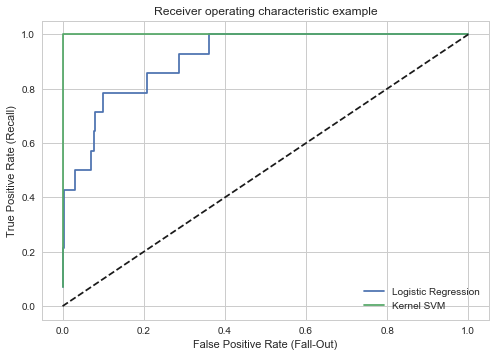

In [13]:
plt.plot(fpr1, tpr1, label="Logistic Regression")
plt.plot(fpr2, tpr2, label="Kernel SVM")
plt.legend()
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.xlabel('False Positive Rate (Fall-Out)') ## 억울한 애들의 비율 false alarm
plt.ylabel('True Positive Rate (Recall)')## 진짜 잘못된것중에 검거된 수의 비율
plt.title('Receiver operating characteristic example')
plt.show() 

## Kernel SVM 0아님 1 
## Recall rate = Fall out = 0 이거나 
## Recall rate = Fall out = 1 일때 


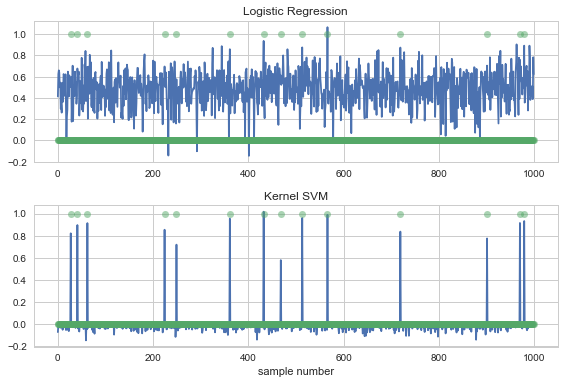

In [14]:
plt.subplot(211)
plt.plot(model1.decision_function(X) * 0.1 + 1)
plt.plot(y, 'o', alpha=0.5)
plt.title("Logistic Regression")

plt.subplot(212)
plt.plot(model2.decision_function(X) + 1)
plt.plot(y, 'o', alpha=0.5)
plt.title("Kernel SVM")
plt.xlabel("sample number")

plt.tight_layout()
plt.show()

## AUC (Area Under the Curve)

AUC는 ROC curve의 면적을 뜻한다. Fall-Out 대비 Recall 값이 클 수록 AUC가 1에 가까운 값이며 민감한 모형이다. ## 잘못된 alarm 대비 실제로 범죄자들을 체포하는 recall 비율 ## ROC면적이 크면 클수록 좋은 Performance 

In [15]:
from sklearn.metrics import auc
auc(fpr1, tpr1), auc(fpr2, tpr2)

(0.91227180527383367, 1.0)